In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the dataset

In [4]:
%cd /content/drive/MyDrive/Course Material/Unsupervised Machine Learning/GaussianMixtureModelClustering

/content/drive/MyDrive/Course Material/Unsupervised Machine Learning/GaussianMixtureModelClustering


In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the elbow method to find the optimal number of clusters

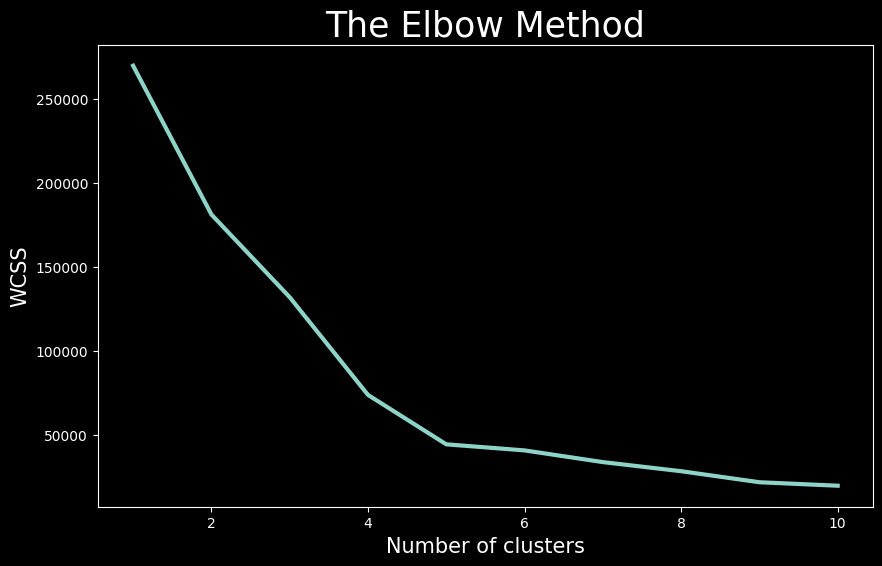

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

## Applying KMeans

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init = 'auto', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [10]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [11]:
centers = kmeans.cluster_centers_

## Visualising the clusters

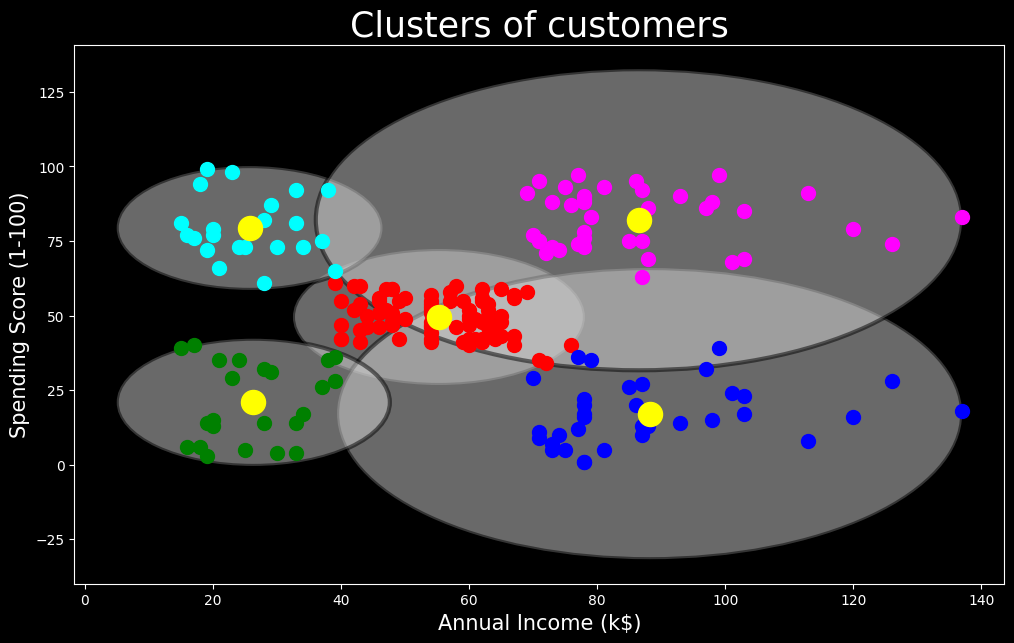

In [12]:
from scipy.spatial.distance import cdist
plt.figure(figsize = (12,7))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
radii = [cdist(X[y_pred == i], [center]).max()
for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax = plt.gca()
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=0))
plt.title('Clusters of customers', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
#plt.legend(fontsize = 15)
plt.show()

# Applying Gaussian Mixture Model Clustering

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 5)
y_pred_gmm = gmm.fit_predict(X)

In [14]:
y_pred_gmm

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

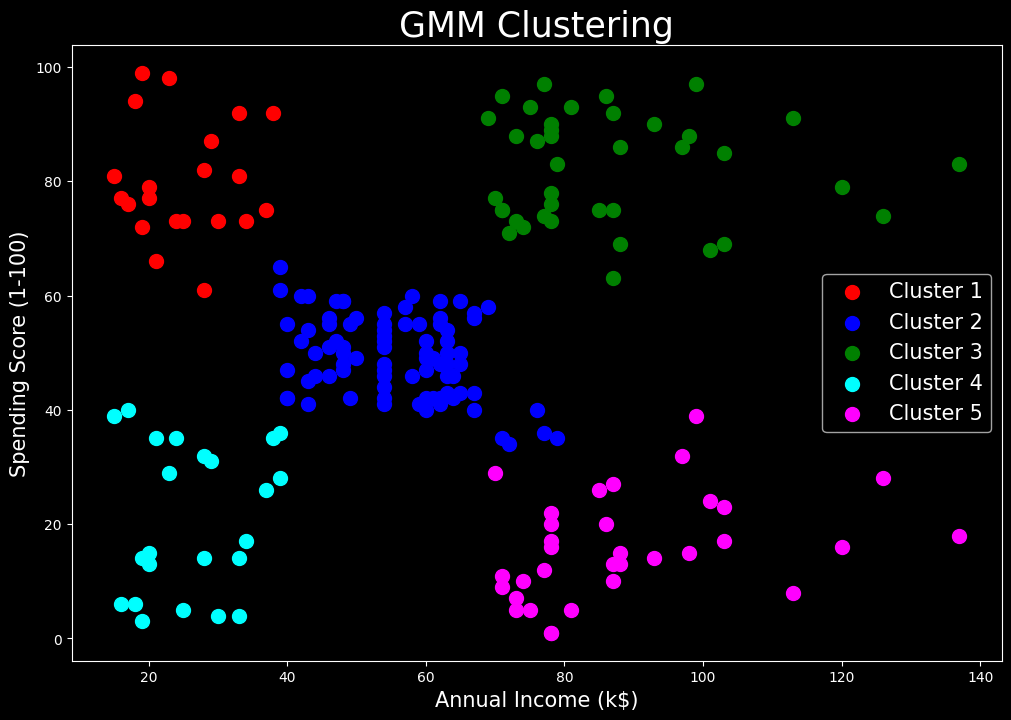

In [15]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred_gmm == 0, 0], X[y_pred_gmm == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred_gmm == 1, 0], X[y_pred_gmm == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred_gmm == 2, 0], X[y_pred_gmm == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred_gmm == 3, 0], X[y_pred_gmm == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred_gmm == 4, 0], X[y_pred_gmm == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('GMM Clustering', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [16]:
prob = gmm.predict_proba(X).round(3)

In [19]:
prob

array([[0.001, 0.   , 0.   , 0.999, 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.002, 0.   , 0.   , 0.998, 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.998, 0.001, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.983, 0.013, 0.   , 0.003, 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.999, 0.   , 0.001, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.997, 0.002, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.9

In [23]:
idx = np.where(prob == 0.008)[0]

In [24]:
XP = X[idx]

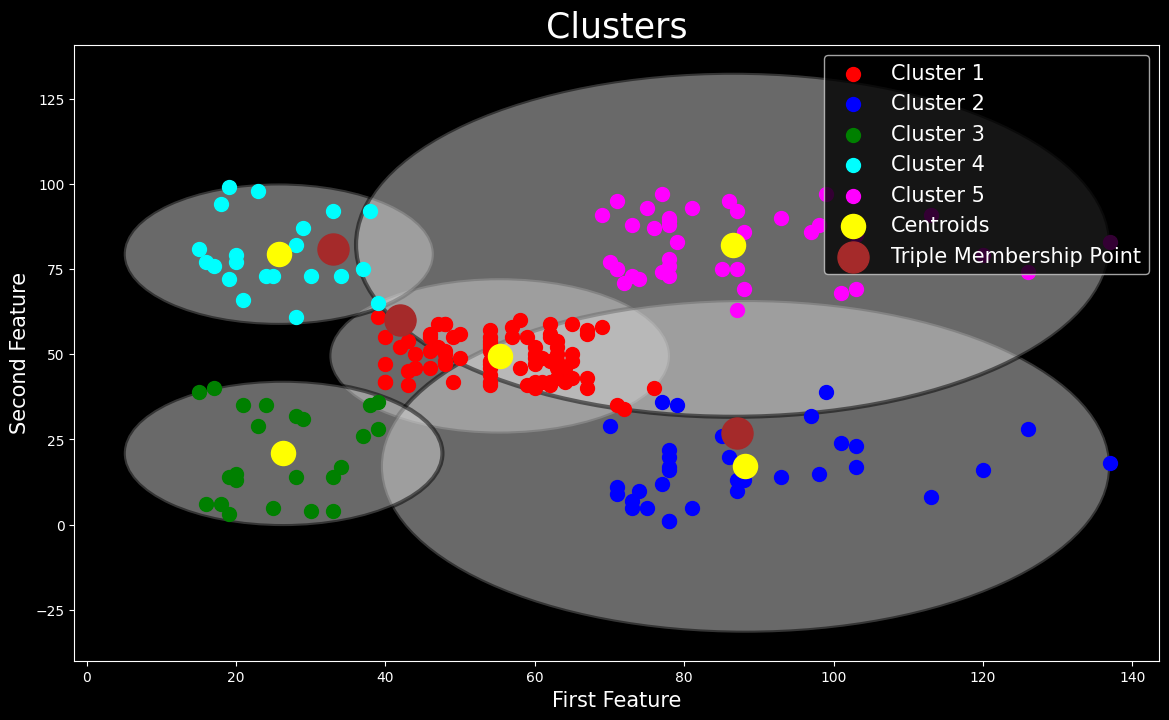

In [25]:
from scipy.spatial.distance import cdist
plt.figure(figsize = (14,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.scatter(XP[:,0], XP[:,1], s= 500, c= 'brown', label = 'Triple Membership Point')
radii = [cdist(X[y_pred == i], [center]).max()
for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax = plt.gca()
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=0))
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()